# Chrun Analysis

## To Do
The purpose of the lab is to **perform analysis** of the customer base of an e-commerce site, determine the characteristics of the individuals who have stopped using the service (known as “customer churn”), and devise strategies to target similar individuals within the dataset and prevent them from changing.

#### Data Gathering
- Download the dataset from Blackboard.

#### Data Cleaning
- Clean your data.

#### Data Analysis
- Using Python tools, import the dataset as a Pandas Dataframe and perform analysis to determine the customer churn characteristics.  Your analysis should include cleaning the data (as needed), X-Y Scatter plots on appropriate variable pairs, and correlation testing.  
a.	You are also permitted to use additional techniques which may not be listed, provided that you can submit a rationale for why the technique is useful and an indication of what you hope to achieve.

#### Model Buliding and accuracy checking
Perform decision tree and logistics regression models.  
- When splitting the data into train and test data, use test_size = 0.20.   
- In a Presentation document, record your observations with respect to the customers who have already churned, and use it to identify the groups of people most likely to churn next.  
- Devise a high-level marketing strategy to entice these individuals to continue using the service.

#### Feature Importance
- Fine which features are importance for this project

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Gathering

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# this file contains feature information
feature_information = pd.read_csv("/content/drive/MyDrive/St.Clair Marketing Analysis/Project 1 Chrun analysis/Data Dictionary.csv")

In [5]:
feature_information

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag (Yes = 1; No = 0)
2,Tenure,Tenure of customer in organization (i.e. lengt...
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spent on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives registered to particu...


In [15]:
# file contains E-commerce Churn Data
data = pd.read_csv("/content/drive/MyDrive/St.Clair Marketing Analysis/Project 1 Chrun analysis/E-Commerce Churn Data.csv")

In [16]:
data.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


## Data Cleaning

In [19]:
# checking total number of uncleaned feature
data.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [20]:
#replacing all empty spaces with np.NaN
data = data.replace(" ", np.NaN)
print(data.isnull().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Exploratory Data Analysis

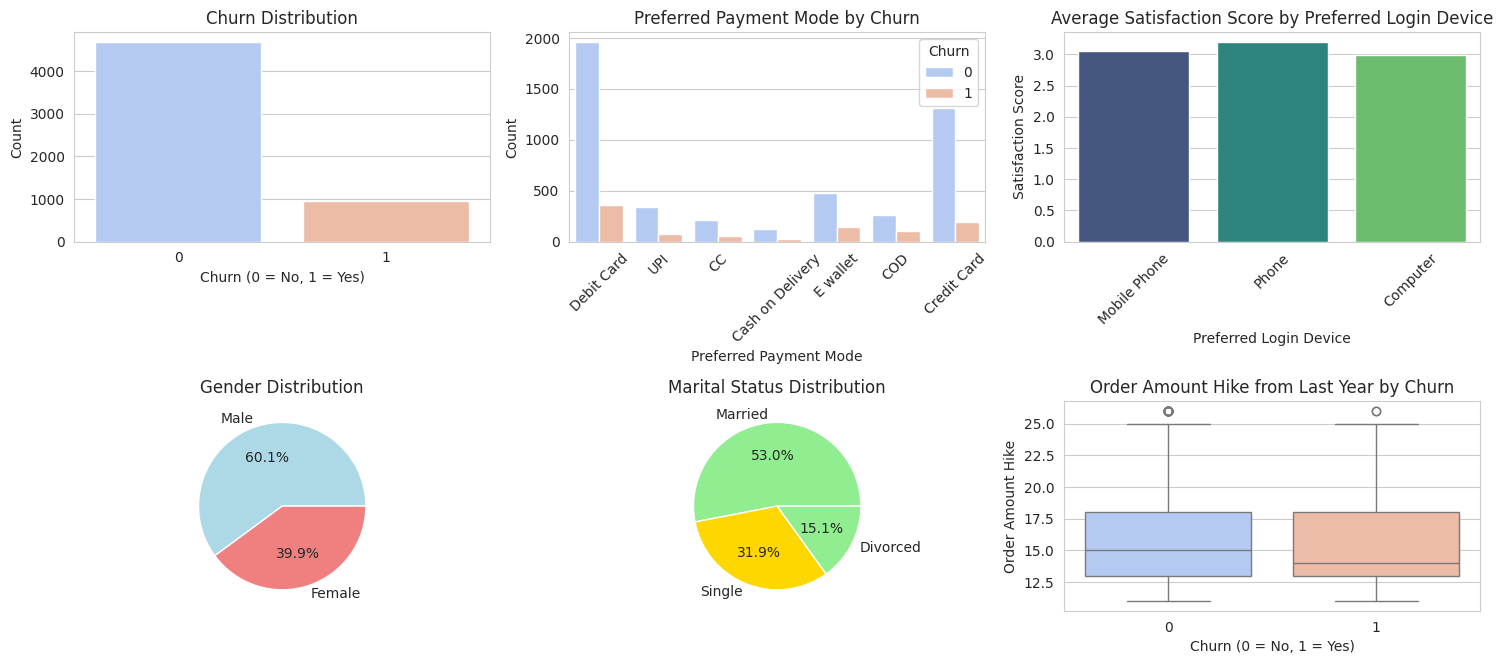

In [22]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

# Bar Plot 1: Churn Distribution
plt.subplot(3, 3, 1)
sns.countplot(x="Churn", data=data, palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Bar Plot 2: Preferred Payment Mode by Churn
plt.subplot(3, 3, 2)
sns.countplot(x="PreferredPaymentMode", hue="Churn", data=data, palette="coolwarm")
plt.title("Preferred Payment Mode by Churn")
plt.xticks(rotation=45)
plt.xlabel("Preferred Payment Mode")
plt.ylabel("Count")

# Bar Plot 3: Average Satisfaction Score by Preferred Login Device
plt.subplot(3, 3, 3)
sns.barplot(x="PreferredLoginDevice", y="SatisfactionScore", data=data, ci=None, palette="viridis")
plt.title("Average Satisfaction Score by Preferred Login Device")
plt.xlabel("Preferred Login Device")
plt.ylabel("Satisfaction Score")
plt.xticks(rotation=45)

# Pie Chart 1: Gender Distribution
plt.subplot(3, 3, 4)
gender_counts = data["Gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Gender Distribution")

# Pie Chart 2: Marital Status Distribution
plt.subplot(3, 3, 5)
marital_counts = data["MaritalStatus"].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct="%1.1f%%", colors=["lightgreen", "gold"])
plt.title("Marital Status Distribution")

# Box Plot: Order Amount Hike from Last Year by Churn
plt.subplot(3, 3, 6)
sns.boxplot(x="Churn", y="OrderAmountHikeFromlastYear", data=data, palette="coolwarm")
plt.title("Order Amount Hike from Last Year by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Order Amount Hike")

# Show plots
plt.tight_layout()
plt.show()


## Feature engineering

In [23]:
# Import libraries for feature engineering
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score,cross_validate,train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import(
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

In [24]:
# for scaling
numerical_feature = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                     'DaySinceLastOrder', 'CashbackAmount']
# one-hot encoding
categorical_feature = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
                       'PreferedOrderCat', 'MaritalStatus']

binary_feature = ['Gender', 'Complain']

# ordinal encoding
ordinal_feature = ['SatisfactionScore']

# print(data['SatisfactionScore'].unique())
orders = [1,2,3,4,5]

# do not include these features
drop_feature = ['CustomerID']

# do not apply any transformation on these
passthrough_feature = []

# target
target_feature = ['Churn']

In [33]:
ct = make_column_transformer(
    (Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
        ('scaler', StandardScaler())
    ]), numerical_feature),

    (OneHotEncoder(handle_unknown='ignore'),categorical_feature),

    (OneHotEncoder(drop='if_binary' , dtype=int),binary_feature),

    (OrdinalEncoder(categories=[orders],dtype=int),ordinal_feature),

    ('drop',drop_feature),
)

In [34]:
ct

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                                  'NumberOfDeviceRegistered',
                                  'OrderAmountHikeFromlastYear', 'CouponUsed',
                                  'OrderCount', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['PreferredLoginDevice', 'CityTier',
                                  'PreferredPaymentMode', 'PreferedOrderCat',
                                  'MaritalStatus']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['Gender', 'Complain']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[[1, 2, 3, 4, 5]],
                                                dtype=<class 'int'>),
                                 ['SatisfactionScore']),
                                ('drop', 'drop', ['CustomerID'])])

### **Splitting Data**

In [35]:
train,test = train_test_split(data ,test_size=0.2,random_state=142)

print(train.shape)
print(test.shape)

(4504, 20)
(1126, 20)


In [36]:
X_train,y_train = data.drop(columns=['Churn']) , data['Churn']
X_test,y_test = data.drop(columns=['Churn']) , data['Churn']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5630, 19)
(5630, 19)
(5630,)
(5630,)


### **Importing Model Libraries**

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### **DummyClassifier**

   fit_time  score_time  test_score  train_score
0  0.032544    0.011758    0.831261     0.831705
1  0.026807    0.011062    0.831261     0.831705
2  0.025651    0.012500    0.831261     0.831705
3  0.030122    0.012924    0.832149     0.831483
4  0.025320    0.011121    0.832149     0.831483

Accuracy: 0.8316163410301953

Precision: 0.0

Recall: 0.0

F1 Score: 0.0

Confusion Matrix:
[[4682    0]
 [ 948    0]]

Test Data Accuracy: 0.831616


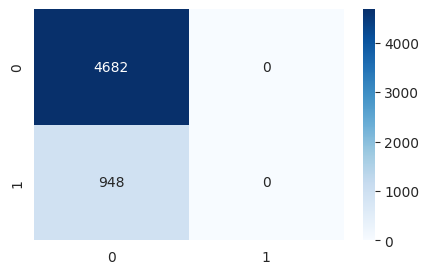

In [38]:
pipe_dummy = make_pipeline(ct ,DummyClassifier())
# print(pipe_dummy)

scores = cross_validate(pipe_dummy , X_train, y_train, cv=5 , return_train_score=True)
print(pd.DataFrame(scores))

pipe_dummy.fit(X_train, y_train)  # This line is added to fit the pipeline
# Evaluate the model's performance
Y_pred = pipe_dummy.predict(X_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

# Print the evaluation metrics
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1 Score:", f1)

# Generate a confusion matrix
confusion_matrix_result = confusion_matrix(y_test, Y_pred)
print("\nConfusion Matrix:")
print(confusion_matrix_result)
print("")

df_cm = pd.DataFrame(confusion_matrix_result, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot = True,fmt="d", cmap="Blues")
print("Test Data Accuracy: %.6f" %accuracy_score(y_test, Y_pred))

### **Logistic Regression**

   fit_time  score_time  test_score  train_score
0  0.340930    0.064877    0.878330     0.884991
1  0.322122    0.046206    0.874778     0.886323
2  0.180262    0.053766    0.884547     0.881217
3  0.328809    0.026278    0.887211     0.882993
4  0.173997    0.044633    0.884547     0.883659

Accuracy: 0.883126110124334

Precision: 0.7361563517915309

Recall: 0.4767932489451477

F1 Score: 0.5787451984635084
Test Data Accuracy: 0.883126


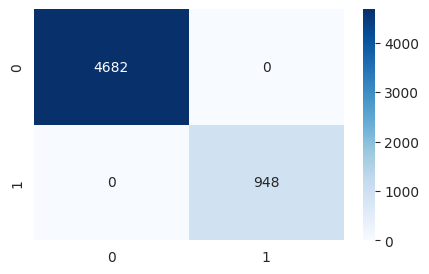

In [48]:
pipe_LR = make_pipeline(ct ,LogisticRegression())

scores = cross_validate(pipe_LR , X_train, y_train, cv=5 , return_train_score=True)
print(pd.DataFrame(scores))

pipe_LR.fit(X_train, y_train)  # This line is added to fit the pipeline
# Evaluate the model's performance
Y_pred = pipe_LR.predict(X_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

# Print the evaluation metrics
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1 Score:", f1)

# Generate a confusion matrix
# confusion_matrix_result = confusion_matrix(y_test, Y_pred)
# print("\nConfusion Matrix:")
# print(confusion_matrix_result)
# print("")

df_cm = pd.DataFrame(confusion_matrix_result, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot = True,fmt="d", cmap="Blues")
print("Test Data Accuracy: %.6f" %accuracy_score(y_test, Y_pred))

### **Decision Tree**

   fit_time  score_time  test_score  train_score
0  0.116779    0.039704    0.981350          1.0
1  0.110473    0.018851    0.976909          1.0
2  0.141740    0.028193    0.988455          1.0
3  0.076675    0.019232    0.977798          1.0
4  0.097164    0.018689    0.976909          1.0

Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1 Score: 1.0
Test Data Accuracy: 1.000000


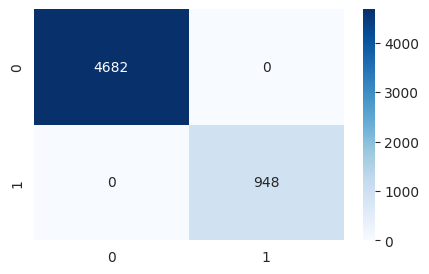

In [49]:
pipe_dt = make_pipeline(ct ,DecisionTreeClassifier())

scores = cross_validate(pipe_dt , X_train, y_train, cv=5 , return_train_score=True)
print(pd.DataFrame(scores))

pipe_dt.fit(X_train, y_train)  # This line is added to fit the pipeline
# Evaluate the model's performance
Y_pred = pipe_dt.predict(X_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

# Print the evaluation metrics
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1 Score:", f1)

# # Generate a confusion matrix
# confusion_matrix_result = confusion_matrix(y_test, Y_pred)
# print("\nConfusion Matrix:")
# print(confusion_matrix_result)
# print("")

df_cm = pd.DataFrame(confusion_matrix_result, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot = True,fmt="d", cmap="Blues")
print("Test Data Accuracy: %.6f" %accuracy_score(y_test, Y_pred))

### **Support vector machine**

   fit_time  score_time  test_score  train_score
0  0.491827    0.120985    0.909414     0.915409
1  0.435708    0.117625    0.908526     0.913854
2  0.436948    0.119007    0.906750     0.915631
3  0.436494    0.120728    0.912966     0.917629
4  0.434511    0.117679    0.906750     0.916741

Accuracy: 0.9204262877442273

Precision: 0.9194630872483222

Recall: 0.5780590717299579

F1 Score: 0.7098445595854922
Test Data Accuracy: 0.920426


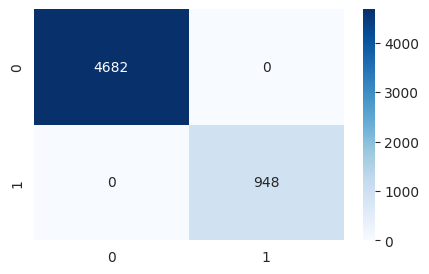

In [50]:
pipe_svc = make_pipeline(ct ,SVC())

scores = cross_validate(pipe_svc , X_train, y_train, cv=5 , return_train_score=True)
print(pd.DataFrame(scores))

pipe_svc.fit(X_train, y_train)  # This line is added to fit the pipeline
# Evaluate the model's performance
Y_pred = pipe_svc.predict(X_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

# Print the evaluation metrics
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1 Score:", f1)

# # Generate a confusion matrix
# confusion_matrix_result = confusion_matrix(y_test, Y_pred)
# print("\nConfusion Matrix:")
# print(confusion_matrix_result)
# print("")

df_cm = pd.DataFrame(confusion_matrix_result, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot = True,fmt="d", cmap="Blues")
print("Test Data Accuracy: %.6f" %accuracy_score(y_test, Y_pred))

### **K Neighbors Classifier**

   fit_time  score_time  test_score  train_score
0  0.099774    0.136959    0.921847     0.939387
1  0.091440    0.210332    0.915631     0.943384
2  0.036821    0.180622    0.936057     0.941385
3  0.047005    0.082775    0.926288     0.944272
4  0.103573    0.138484    0.931616     0.941385

Accuracy: 0.9509769094138544

Precision: 0.9329896907216495

Recall: 0.7637130801687764

F1 Score: 0.839907192575406
Test Data Accuracy: 0.950977


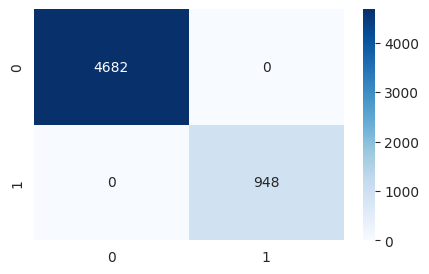

In [51]:
pipe_knn = make_pipeline(ct ,KNeighborsClassifier())

scores = cross_validate(pipe_knn , X_train, y_train, cv=5 , return_train_score=True)
print(pd.DataFrame(scores))

pipe_knn.fit(X_train, y_train)  # This line is added to fit the pipeline
# Evaluate the model's performance
Y_pred = pipe_knn.predict(X_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

# Print the evaluation metrics
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1 Score:", f1)
# # Generate a confusion matrix
# confusion_matrix_result = confusion_matrix(y_test, Y_pred)
# print("\nConfusion Matrix:")
# print(confusion_matrix_result)
# print("")

df_cm = pd.DataFrame(confusion_matrix_result, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot = True,fmt="d", cmap="Blues")
print("Test Data Accuracy: %.6f" %accuracy_score(y_test, Y_pred))

### **Random Forest Classifier**

   fit_time  score_time  test_score  train_score
0  0.980228    0.053537    0.988455          1.0
1  0.897913    0.048983    0.974245          1.0
2  2.042689    0.054760    0.988455          1.0
3  0.871003    0.047150    0.982238          1.0
4  0.912129    0.049595    0.978686          1.0

Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1 Score: 1.0
Test Data Accuracy: 1.000000


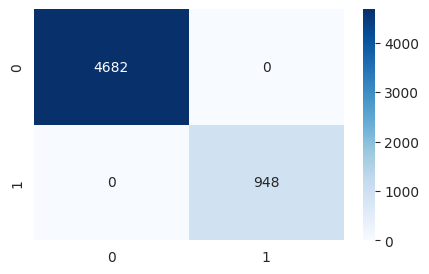

In [52]:
pipe_rfc = make_pipeline(ct ,RandomForestClassifier())

scores = cross_validate(pipe_rfc , X_train, y_train, cv=5 , return_train_score=True)
print(pd.DataFrame(scores))

pipe_rfc.fit(X_train, y_train)  # This line is added to fit the pipeline
# Evaluate the model's performance
Y_pred = pipe_rfc.predict(X_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

# Print the evaluation metrics
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1 Score:", f1)

# # Generate a confusion matrix
# confusion_matrix_result = confusion_matrix(y_test, Y_pred)
# print("\nConfusion Matrix:")
# print(confusion_matrix_result)
# print("")

df_cm = pd.DataFrame(confusion_matrix_result, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (5,3))
sns.heatmap(df_cm, annot = True,fmt="d", cmap="Blues")
print("Test Data Accuracy: %.6f" %accuracy_score(y_test, Y_pred))

### **Feature Importance**

In [46]:
from rfpimp import *

# selected model is : RandomForest
feature_names_after_transform = pipe_rfc.named_steps['columntransformer'].get_feature_names_out()

feature_importance1 = pipe_rfc.named_steps['randomforestclassifier'].feature_importances_

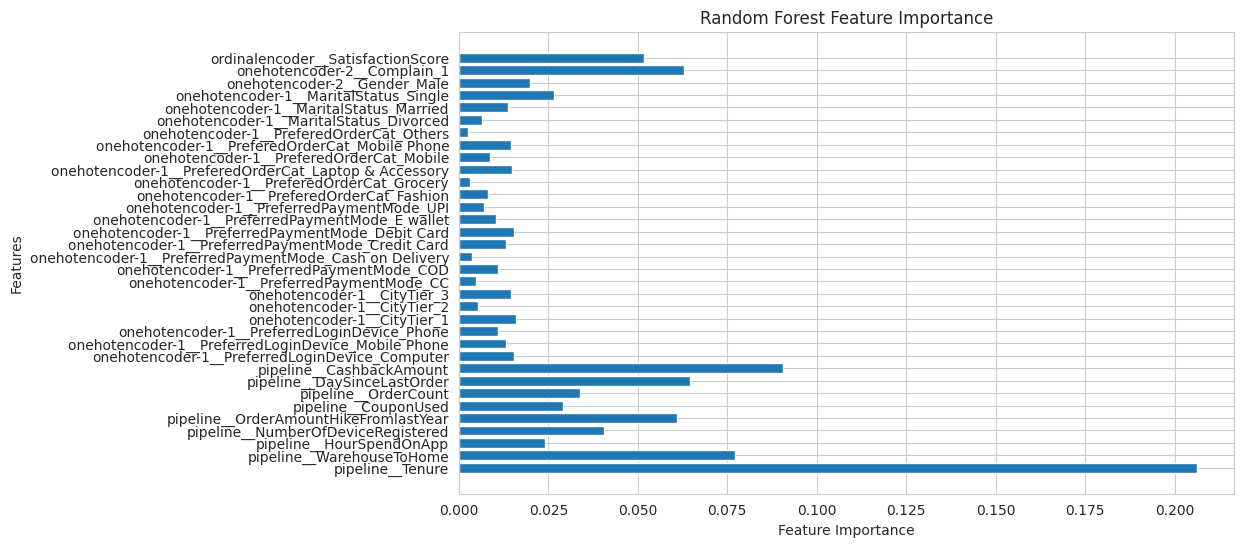

In [47]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names_after_transform, feature_importance1) # Use transformed feature names
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()